In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def newton(x0, f, df, tol=1e-5, maxiter=100): #This part stays the same regardless of problem.
    for n in range(0, maxiter):
        if np.size(x0) == 1:
            y = -f(x0)/df(x0)
            x1 = x0 + y
            if abs(x1-x0)<tol:
                return x1
            else:
                x0 = x1
        else:
            y = np.linalg.solve(df(x0),-f(x0))
            x1 = x0 + y
            if np.linalg.norm(x1-x0,ord=np.inf)<tol:
                return x1
            else:
                x0 = x1
            
#This part defers between questions.
def F_ex1(X):
    x = X[0]
    y = X[1]
    return np.array([x**3 + y - 1, y**3 - x + 1])

def DF_ex1(X):
    x = X[0]
    y = X[1]
    return np.array([[3*x**2,1],[-1,3*y**2]])

In [3]:
x0 = np.array([1,2])
newton(x0,F_ex1,DF_ex1)

array([1.00000000e+00, 1.13386543e-16])

In [4]:
def F_bvp1(U):
    N = len(U)
    h = 2/(N+2)
    D2 = -2*np.diag(np.ones(N),0) + np.diag(np.ones(N-1),-1) + np.diag(np.ones(N-1),1)
    D2 = D2/h**2
    return np.matmul(D2,U) - np.exp(U)

def DF_bvp1(U):
    N = len(U)
    h = 2/(N+2)
    D2 = -2*np.diag(np.ones(N),0) + np.diag(np.ones(N-1),-1) + np.diag(np.ones(N-1),1)
    D2 = D2/h**2
    return D2 - np.diag(np.exp(U),0)

In [5]:
U0 = np.zeros(10)
x = np.linspace(-1,1,len(U0)+2)

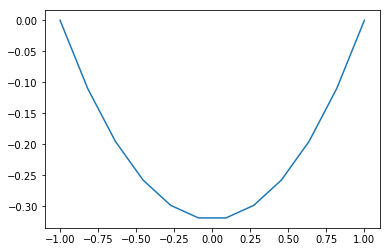

In [6]:
UInt = newton(U0,F_bvp1,DF_bvp1)
U = np.hstack([0,UInt,0])
plt.plot(x,U)
plt.show()

In [7]:
def F_eg3(u):
    return (u**2-1)*(u**2-4) + (u**2)*np.exp(1/10*u)

def DF_eg3(u):
    return (4*u**3 - 10*u + 2*u*np.exp(1/10*u)) + 1/10*(u**2)*np.exp(1/10*u)

In [8]:
U0 = 0.75
newton(U0,F_eg3,DF_eg3)

-1.6207847468130068